In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/us-mental-client-data/mhcld_puf_2022.csv")

In [4]:
df.shape

(6957919, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957919 entries, 0 to 6957918
Data columns (total 40 columns):
 #   Column       Dtype  
---  ------       -----  
 0   YEAR         int64  
 1   AGE          float64
 2   EDUC         object 
 3   ETHNIC       object 
 4   RACE         object 
 5   GENDER       object 
 6   SPHSERVICE   object 
 7   CMPSERVICE   object 
 8   OPISERVICE   object 
 9   RTCSERVICE   object 
 10  IJSSERVICE   object 
 11  MH1          object 
 12  MH2          object 
 13  MH3          object 
 14  SUB          object 
 15  MARSTAT      object 
 16  SMISED       object 
 17  SAP          object 
 18  EMPLOY       object 
 19  DETNLF       object 
 20  VETERAN      object 
 21  LIVARAG      object 
 22  NUMMHS       int64  
 23  TRAUSTREFLG  int64  
 24  ANXIETYFLG   int64  
 25  ADHDFLG      int64  
 26  CONDUCTFLG   int64  
 27  DELIRDEMFLG  int64  
 28  BIPOLARFLG   int64  
 29  DEPRESSFLG   int64  
 30  ODDFLG       int64  
 31  PDDFLG       int64  
 32

In [6]:
print("Number of duplicated row: ", df.duplicated().sum())

Number of duplicated row:  0


In [7]:
df.columns

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

In [8]:
df_selected = df.drop(columns=['YEAR','MH3','NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG','CASEID'])

In [9]:
df_selected.columns

Index(['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE',
       'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'SUB',
       'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN', 'LIVARAG',
       'STATEFIP', 'DIVISION', 'REGION'],
      dtype='object')

In [10]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6957919 entries, 0 to 6957918
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   AGE         float64
 1   EDUC        object 
 2   ETHNIC      object 
 3   RACE        object 
 4   GENDER      object 
 5   SPHSERVICE  object 
 6   CMPSERVICE  object 
 7   OPISERVICE  object 
 8   RTCSERVICE  object 
 9   IJSSERVICE  object 
 10  MH1         object 
 11  MH2         object 
 12  SUB         object 
 13  MARSTAT     object 
 14  SMISED      object 
 15  SAP         object 
 16  EMPLOY      object 
 17  DETNLF      object 
 18  VETERAN     object 
 19  LIVARAG     object 
 20  STATEFIP    object 
 21  DIVISION    object 
 22  REGION      object 
dtypes: float64(1), object(22)
memory usage: 1.2+ GB


In [11]:
# Keep the client (row) where they are diagnose as two mental illness (MH2 is not null)
df_selected = df_selected[~df_selected["MH2"].isnull()].reset_index(drop=True)

In [12]:
df_selected.shape


(2240669, 23)

In [13]:
# Calculate the number of missing values for each column
missing_values_count = df_selected.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (df_selected.isnull().sum() / df_selected.shape[0]) * 100

# Combine the results into a new DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Missing Percentage (%)': missing_values_percentage
})

# Format the 'Missing Percentage (%)' column to two decimal places
missing_info['Missing Percentage (%)'] = missing_info['Missing Percentage (%)'].apply(lambda x: f"{x:.2f}")

print(missing_info)

            Missing Values Missing Percentage (%)
AGE                    142                   0.01
EDUC                854093                  38.12
ETHNIC              242682                  10.83
RACE                227099                  10.14
GENDER                2374                   0.11
SPHSERVICE               0                   0.00
CMPSERVICE               0                   0.00
OPISERVICE               0                   0.00
RTCSERVICE               0                   0.00
IJSSERVICE               0                   0.00
MH1                      0                   0.00
MH2                      0                   0.00
SUB                1738841                  77.60
MARSTAT             900871                  40.21
SMISED               88452                   3.95
SAP                 115485                   5.15
EMPLOY             1143182                  51.02
DETNLF             1721731                  76.84
VETERAN            1198975                  53.51


In [14]:
# Drop column with more 50% null value 
df_selected = df_selected.drop(columns=['SUB','EMPLOY','DETNLF','VETERAN'])

In [15]:
df_selected.columns

Index(['AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE', 'CMPSERVICE',
       'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2', 'MARSTAT',
       'SMISED', 'SAP', 'LIVARAG', 'STATEFIP', 'DIVISION', 'REGION'],
      dtype='object')

In [16]:
df_temp = df_selected.copy() # Make a copy


In [17]:
for col in df_temp.columns:
    column_type = df_temp[col].dtype
    
    if (column_type == 'float64'):
        na_replacement = df_temp[col].mean()
    else:
        na_replacement = df_temp[col].mode()[0]
                
    df_temp[col] = df_temp[col].fillna(na_replacement)



In [18]:
df_temp["EDUC"].isnull().sum()

0

In [19]:
# Calculate the number of missing values for each column
missing_values_count = df_temp.isnull().sum()

# Calculate the percentage of missing values for each column
missing_values_percentage = (df_temp.isnull().sum() / df_temp.shape[0]) * 100

# Combine the results into a new DataFrame
missing_info = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Missing Percentage (%)': missing_values_percentage
})

# Format the 'Missing Percentage (%)' column to two decimal places
missing_info['Missing Percentage (%)'] = missing_info['Missing Percentage (%)'].apply(lambda x: f"{x:.2f}")

print(missing_info)


            Missing Values Missing Percentage (%)
AGE                      0                   0.00
EDUC                     0                   0.00
ETHNIC                   0                   0.00
RACE                     0                   0.00
GENDER                   0                   0.00
SPHSERVICE               0                   0.00
CMPSERVICE               0                   0.00
OPISERVICE               0                   0.00
RTCSERVICE               0                   0.00
IJSSERVICE               0                   0.00
MH1                      0                   0.00
MH2                      0                   0.00
MARSTAT                  0                   0.00
SMISED                   0                   0.00
SAP                      0                   0.00
LIVARAG                  0                   0.00
STATEFIP                 0                   0.00
DIVISION                 0                   0.00
REGION                   0                   0.00


In [20]:
information_gain = []
encoder = LabelEncoder()
# Encode categorical data to numerical data
y = encoder.fit_transform(df_temp["MH2"])

for col in df_temp.columns:        
    if (col != "MH2"):
        if (col != "AGE"):
            df_temp[col] = encoder.fit_transform(df_temp[col])
        
        X = df_temp[[col]]
        mi = mutual_info_classif(X, y, discrete_features=True)
        information_gain.append(mi)
        
# Create a DataFrame
df_infor = pd.DataFrame({
    'Column': df_selected.drop(columns=['MH2']).columns,
    'information score': information_gain
})

# Sort in descending order
df_sorted = df_infor.sort_values(by='information score', ascending=False).reset_index(drop=True)
df_sorted

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


,Column,information score
0,MH1,[0.2991622001408748]
1,STATEFIP,[0.1587305308604965]
2,AGE,[0.11586071776549316]
3,SMISED,[0.07483627908014684]
4,DIVISION,[0.07378228485469857]
5,REGION,[0.039686599389803824]
6,EDUC,[0.0381609546270405]
7,SAP,[0.03226436797413195]
8,GENDER,[0.0241580099605408]
9,MARSTAT,[0.01691041765442003]


In [21]:
df_top = df_selected.drop(columns=['LIVARAG','SPHSERVICE','CMPSERVICE','RACE','OPISERVICE','ETHNIC','IJSSERVICE','RTCSERVICE'])

In [22]:
df_top.columns

Index(['AGE', 'EDUC', 'GENDER', 'MH1', 'MH2', 'MARSTAT', 'SMISED', 'SAP',
       'STATEFIP', 'DIVISION', 'REGION'],
      dtype='object')

# Preprocessing

## Gender Column

In [67]:
# Dirtify 
# Randomly select a subset of rows
def random_subset(df_set, number):
    return df_set.sample(n=number).index  

# Replace the AGE values in the selected rows with 0
df_top.loc[random_subset(df_top[df_top['GENDER'] == 'Male'], 230), 'GENDER'] = "male"
df_top.loc[random_subset(df_top[df_top['GENDER'] == 'Male'], 42), 'GENDER'] = "m"
df_top.loc[random_subset(df_top[df_top['GENDER'] == 'Female'], 102), 'GENDER'] = "female"
df_top.loc[random_subset(df_top[df_top['GENDER'] == 'Female'], 93), 'GENDER'] = "f"

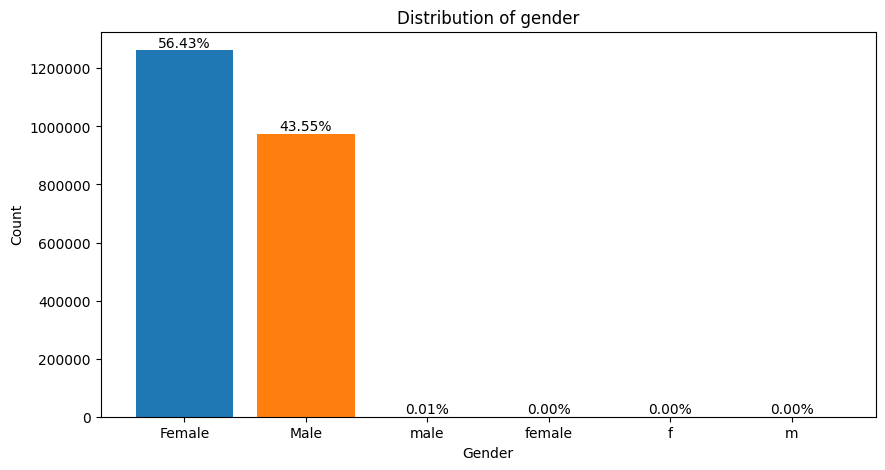

In [70]:
# Get the value counts as integers and sort by index
temp = df_top['GENDER'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Calculate the percentages
percentages = temp / temp.sum() * 100

# Create the bar plot
bars = plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')
    
# Set chart title and labels
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of gender")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

### Standardise gender

In [18]:
gender_mapping = {
    'Male': 'Male',
    'male': 'Male', 
    'm': 'Male',
    'M': 'Male',
    'Female': 'Female', 
    'female': 'Female', 
    'f': 'Female', 
    'F': 'Female'
}

# Standardize gender values
df_top['GENDER'] = df_top['GENDER'].map(gender_mapping)


### Check null

In [19]:
df_top["GENDER"].isna().sum()

2374

In [20]:
gender_mh_distribution = df_top.groupby('MH1')['GENDER'].value_counts().unstack()
gender_mh_distribution = gender_mh_distribution.idxmax(axis=1)
print(gender_mh_distribution)

MH1
Alcohol or substance use disorders                   Male
Anxiety disorders                                  Female
Attention deficit/hyperactivity disorder (ADHD)      Male
Bipolar disorders                                  Female
Conduct disorders                                    Male
Delirium/dementia disorders                        Female
Depressive disorders                               Female
Oppositional defiant disorders                       Male
Other disorders/conditions                           Male
Personality disorders                              Female
Pervasive developmental disorders                    Male
Schizophrenia or other psychotic disorders           Male
Trauma- and stressor-related disorders             Female
dtype: object


In [21]:
# Replace null value in gender column with the mode value based on mh1 column
for mh, gender in gender_mh_distribution.items():
    df_top.loc[(df_top['GENDER'].isna()) & (df_top['MH1'] == mh), 'GENDER'] = gender

### After cleanning

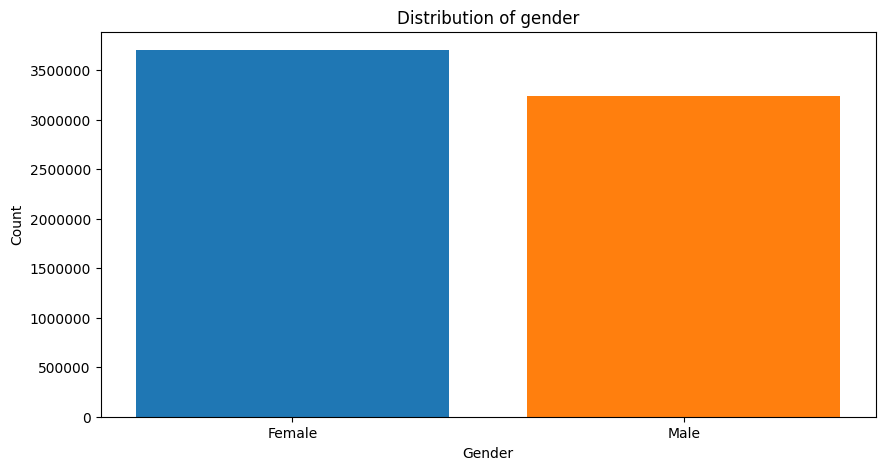

In [22]:
# Get the value counts as integers and sort by index
temp = df['GENDER'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of gender")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

In [22]:
print("gender null value after cleaning: ", df_top["GENDER"].isna().sum())

gender null value after cleaning: 0


## Age Column

In [23]:
# Dirtify 
# Randomly select a subset of rows
def random_subset(df_temp, number):
    return df_temp.sample(n=number).index  

# Replace the AGE values in the selected rows with 0
df_top.loc[random_subset(df_top[~df_top["AGE"].isna()],371), 'AGE'] = 0
df_top.loc[random_subset(df_top[~df_top["AGE"].isna()],809), 'AGE'] = -1
df_top.loc[random_subset(df_top[~df_top["AGE"].isna()],1202), 'AGE'] = random.randint(100, 120)

In [24]:
df_top[(df_top['AGE'].isna())].shape[0]

142

In [25]:
# Replace the null value with -9 so that we can visualize the boxplot
df_top.loc[df_top["AGE"].isna(), 'AGE'] = -9

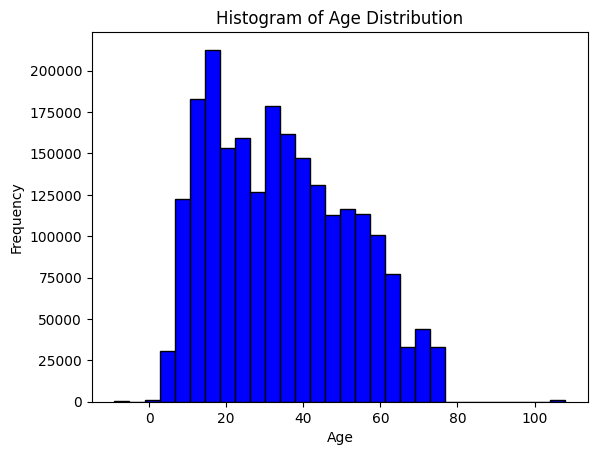

In [26]:
# Plot the histogram for the 'AGE' column
plt.hist(df_top['AGE'], bins=30, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

# Show the plot
plt.show()

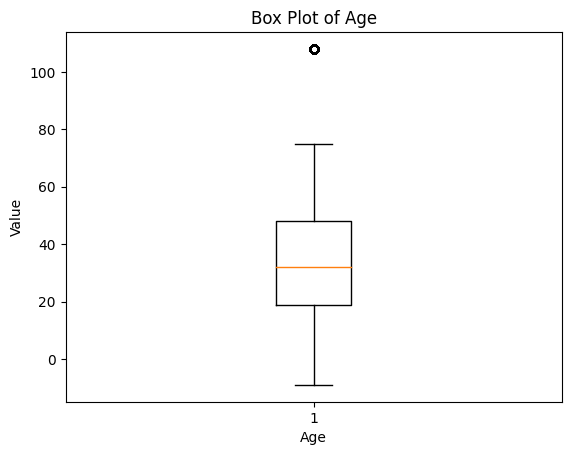

In [27]:
plt.boxplot(df_top['AGE'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Box Plot of Age')

# Show the plot
plt.show()

In [28]:
df_top["AGE"].describe().astype(int)

count    2240669
mean          34
std           17
min           -9
25%           19
50%           32
75%           48
max          108
Name: AGE, dtype: int64

### Clean null value and outlier in age column

In [29]:
normal_age = df_top[(df_top["AGE"] >=1) & (df_top["AGE"] <=75)]

# find average age based on MH1 
average_age_mh = np.floor(normal_age.groupby('MH1')['AGE'].mean()).astype(int)

print(average_age_mh)

MH1
Alcohol or substance use disorders                 39
Anxiety disorders                                  32
Attention deficit/hyperactivity disorder (ADHD)    17
Bipolar disorders                                  40
Conduct disorders                                  18
Delirium/dementia disorders                        60
Depressive disorders                               37
Oppositional defiant disorders                     14
Other disorders/conditions                         28
Personality disorders                              39
Pervasive developmental disorders                  17
Schizophrenia or other psychotic disorders         44
Trauma- and stressor-related disorders             31
Name: AGE, dtype: int64


In [30]:
# Replace null and outlier value in age with the average value based on MH1 column
for mh, value in average_age_mh.items():
    df_top.loc[(df_top["AGE"] <1) | (df_top["AGE"] >75) & (df_top['MH1'] == mh), 'AGE'] = value

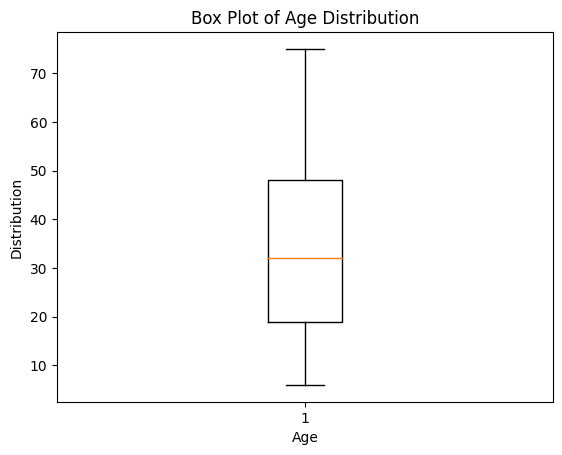

In [31]:
plt.boxplot(df_top['AGE'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Box Plot of Age Distribution')

# Show the plot
plt.show()

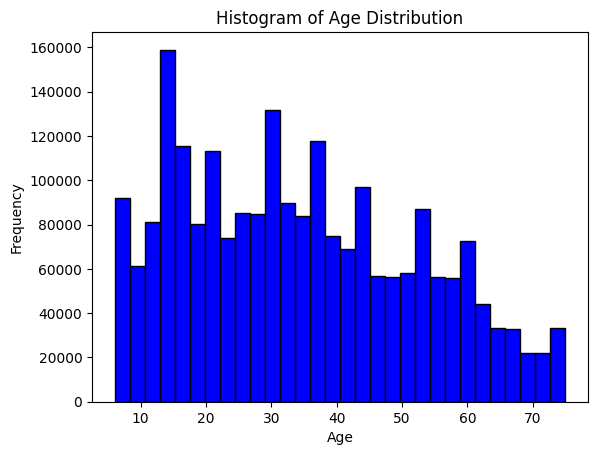

In [32]:
# Plot the histogram for the 'AGE' column
plt.hist(df_top['AGE'], bins=30, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Distribution')

# Show the plot
plt.show()

In [33]:
df_top["AGE"].describe().astype(int)

count    2240669
mean          34
std           17
min            6
25%           19
50%           32
75%           48
max           75
Name: AGE, dtype: int64

In [34]:
print("Age null value (After Cleaning): ", df_top["AGE"].isna().sum())

Age null value (After Cleaning):  0


### Categorize age into age group

In [59]:
# Define the bins and labels for age groups
# Based in https://www.nimh.nih.gov/health/statistics/mental-illness
bins = [0, 17, 25, 49, 100]
labels = ['< 18', '18 - 25', '26 - 49', '50+']


# Categorize the AGE column into the specified groups
df_top['AGE_GROUP'] = pd.cut(df_top['AGE'], bins=bins, labels=labels, right=False)

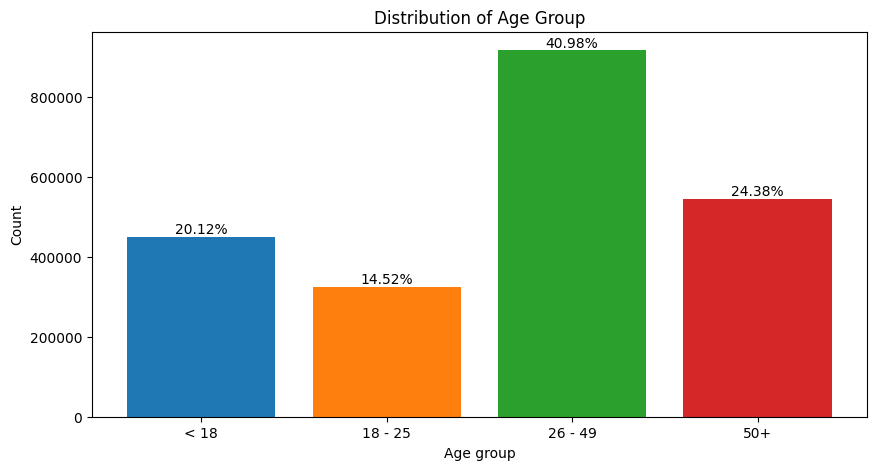

In [63]:
# Get the value counts as integers and sort by index
temp = df_top['AGE_GROUP'].value_counts()

# Define the order of columns (age groups)
column_order = ['< 18', '18 - 25', '26 - 49', '50+']
temp = temp.reindex(column_order)

# Calculate percentages
total_count = temp.sum()
percentages = (temp / total_count) * 100

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
bars = plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Add percentages on top of the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')
    
# Set chart title and labels
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Distribution of Age Group")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

## SMISED Column

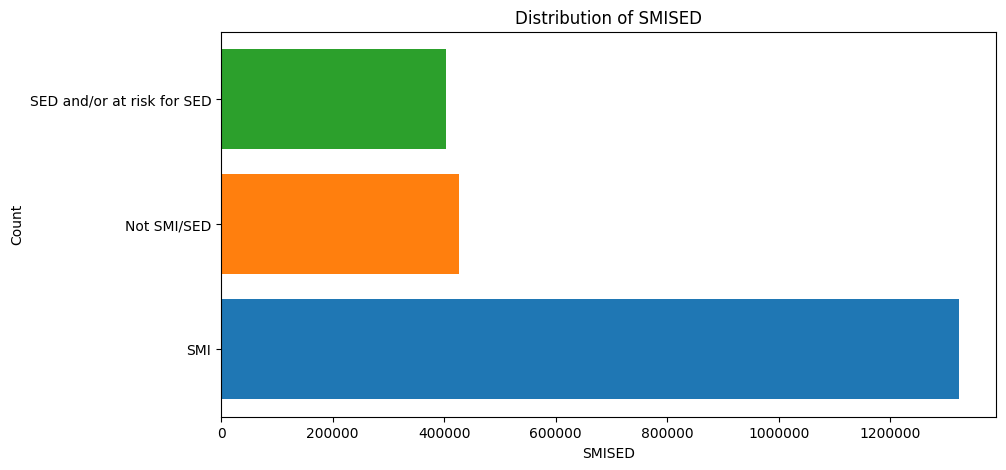

In [36]:
# Get the value counts as integers and sort by index
temp = df_top['SMISED'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("SMISED")
plt.ylabel("Count")
plt.title("Distribution of SMISED")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

In [37]:
print("SMISED null value: ", df_top["SMISED"].isna().sum())

SMISED null value:  88452


### Clean null value

In [66]:
smised_mh_age_grp_distribution = df_top.groupby(['AGE_GROUP','MH1'], observed=True)['SMISED'].value_counts().unstack()
smised_mh_age_grp_majority = smised_mh_age_grp_distribution.idxmax(axis=1) # first occurrence of the maximum value
print(smised_mh_age_grp_majority)

AGE_GROUP  MH1                                            
< 18       Alcohol or substance use disorders                 SED and/or at risk for SED
           Anxiety disorders                                  SED and/or at risk for SED
           Attention deficit/hyperactivity disorder (ADHD)    SED and/or at risk for SED
           Bipolar disorders                                  SED and/or at risk for SED
           Conduct disorders                                  SED and/or at risk for SED
           Delirium/dementia disorders                        SED and/or at risk for SED
           Depressive disorders                               SED and/or at risk for SED
           Oppositional defiant disorders                     SED and/or at risk for SED
           Other disorders/conditions                         SED and/or at risk for SED
           Personality disorders                              SED and/or at risk for SED
           Pervasive developmental disorders       

In [39]:
for (age_group, mh1), smised in smised_mh_age_grp_majority.items():
    df_top.loc[(df_top['SMISED'].isna()) & (df_top['AGE_GROUP'] == age_group) & (df_top['MH1'] == mh1), 'SMISED'] = smised


### After cleaning

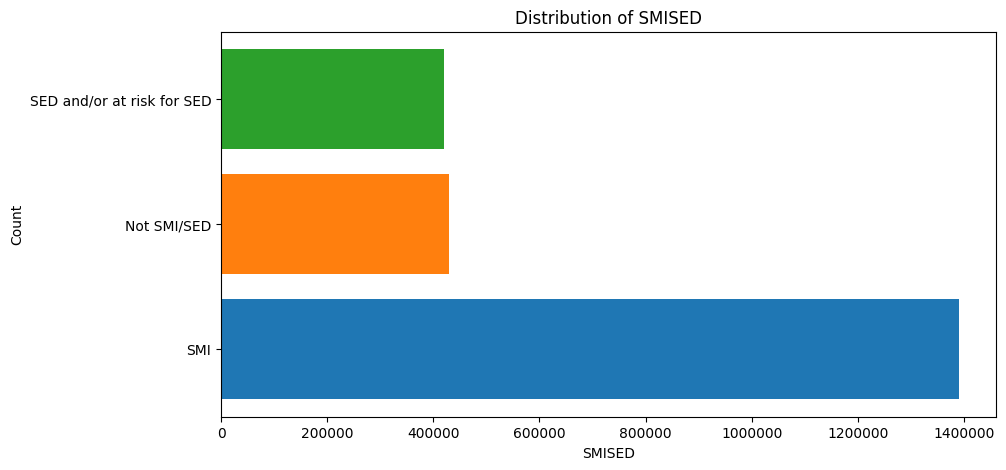

In [40]:
# Get the value counts as integers and sort by index
temp = df_top['SMISED'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("SMISED")
plt.ylabel("Count")
plt.title("Distribution of SMISED")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

In [41]:
print("SMISED null value (after cleaning): ", df_top["SMISED"].isna().sum())

SMISED null value (after cleaning):  0


## SAP (Substance use problem) column

In [20]:
print("SAP null value: ", df_top["SAP"].isna().sum())

SAP null value:  115485


### Clean null value

In [67]:
sap_mh_age_grp_distribution = df_top.groupby(['AGE_GROUP','MH1'], observed=True)['SAP'].value_counts().unstack()
sap_mh_age_grp_majority = sap_mh_age_grp_distribution.idxmax(axis=1) # first occurrence of the maximum value
print(sap_mh_age_grp_majority)

AGE_GROUP  MH1                                            
< 18       Alcohol or substance use disorders                 Yes
           Anxiety disorders                                   No
           Attention deficit/hyperactivity disorder (ADHD)     No
           Bipolar disorders                                   No
           Conduct disorders                                   No
           Delirium/dementia disorders                         No
           Depressive disorders                                No
           Oppositional defiant disorders                      No
           Other disorders/conditions                          No
           Personality disorders                               No
           Pervasive developmental disorders                   No
           Schizophrenia or other psychotic disorders          No
           Trauma- and stressor-related disorders              No
18 - 25    Alcohol or substance use disorders                 Yes
           Anxiet

In [35]:
for (age_group, mh1), sap in sap_mh_age_grp_majority.items():
    df_top.loc[(df_top['SAP'].isna()) & (df_top['AGE_GROUP'] == age_group) & (df_top['MH1'] == mh1), 'SAP'] = sap


### After cleaning

In [36]:
print("SAP null value after cleaning: ", df_top["SAP"].isna().sum())

SAP null value after cleaning:  0


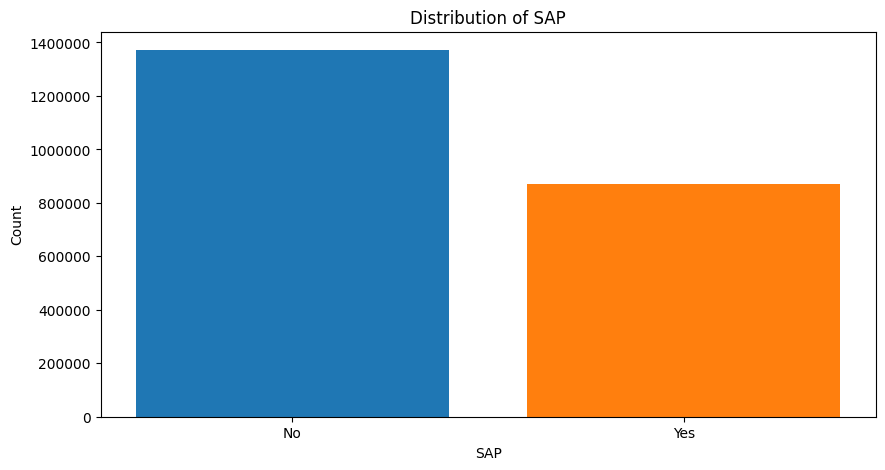

In [38]:
# Get the value counts as integers and sort by index
temp = df_top['SAP'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("SAP")
plt.ylabel("Count")
plt.title("Distribution of SAP")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

## Marital Status Column

In [80]:
# Dirtify 
# Randomly select a subset of rows
def random_subset(df_set, number):
    return df_set.sample(n=number).index  


df_top.loc[random_subset(df_top[df_top['MARSTAT'] == 'Never married'], 30000), 'MARSTAT'] = "Single"
df_top.loc[random_subset(df_top[df_top['MARSTAT'] == 'Divorced, widowed'], 2), 'MARSTAT'] = "Divorce"
df_top.loc[random_subset(df_top[df_top['MARSTAT'] == 'Never married'], 21), 'MARSTAT'] = "1"


In [48]:
df_top['MARSTAT'].unique()

array(['Now married', 'Never married', nan, 'Separated',
       'Divorced, widowed', 'Single', '1', 'Divorce'], dtype=object)

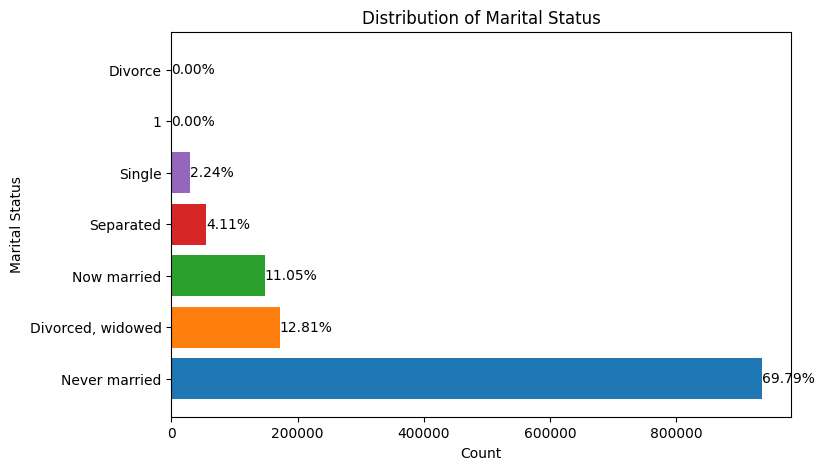

In [82]:
# Get the value counts as integers and sort by index
temp = df_top['MARSTAT'].value_counts()

# Calculate the percentages
percentages = temp / temp.sum() * 100

# Create the figure and set figsize
fig = plt.figure(figsize=(8, 5))

# Create the horizontal bar plot
bars = plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Add percentage labels to each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', 
             va='center', ha='left')

# Set chart title and labels
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.title("Distribution of Marital Status")

# Use ticklabel_format to avoid scientific notation for counts (x-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()


### Standardise

In [50]:
marital_mapping = {
    'Single': 'Never married',
    'Divorce': 'Divorced, widowed'
}

df_top.loc[(df_top['MARSTAT'] == 'Single'), 'MARSTAT'] = 'Never married'
df_top.loc[(df_top['MARSTAT'] == 'Divorce'), 'MARSTAT'] = 'Divorced, widowed'

### Check null

In [51]:
df_top["MARSTAT"].isna().sum()

900871

In [52]:
# Replace noisy data with null value
df_top.loc[(df_top['MARSTAT'] == '1'), 'MARSTAT'] = np.nan

### Clean null and noisy data

In [53]:
df_top.columns

Index(['AGE', 'EDUC', 'GENDER', 'MH1', 'MH2', 'MARSTAT', 'SMISED', 'SAP',
       'STATEFIP', 'DIVISION', 'REGION', 'AGE_GROUP'],
      dtype='object')

In [68]:
age_state_mar_distribution = df_top.groupby(['AGE_GROUP','STATEFIP'], observed=True)['MARSTAT'].value_counts().unstack()
age_state_mar_distribution = age_state_mar_distribution.idxmax(axis=1)
print(age_state_mar_distribution)

AGE_GROUP  STATEFIP     
< 18       Alabama              Never married
           Alaska               Never married
           Arizona              Never married
           California           Never married
           Colorado             Never married
                                  ...        
50+        Utah             Divorced, widowed
           Vermont          Divorced, widowed
           Washington           Never married
           West Virginia    Divorced, widowed
           Wyoming          Divorced, widowed
Length: 186, dtype: object


In [55]:
for (age_group, state), marital in age_state_mar_distribution.items():
    df_top.loc[(df_top['MARSTAT'].isna()) & (df_top['AGE_GROUP'] == age_group) & (df_top['STATEFIP'] == state), 'MARSTAT'] = marital


### After cleaning

In [56]:
print("MARSTAT null value after cleaning: ", df_top["MARSTAT"].isna().sum())

MARSTAT null value after cleaning:  0


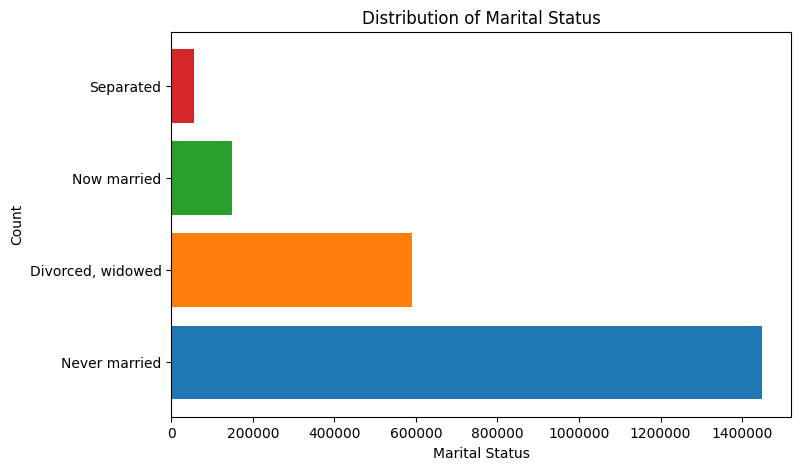

In [57]:
# Get the value counts as integers and sort by index
temp = df_top['MARSTAT'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(8, 5))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Distribution of Marital Status")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

## Education Column

In [84]:
# Dirtify 
# Randomly select a subset of rows
def random_subset(df_set, number):
    return df_set.sample(n=number).index  

df_top.loc[random_subset(df_top[df_top['EDUC'] == '12 (or GED)'], 21), 'EDUC'] = "109"


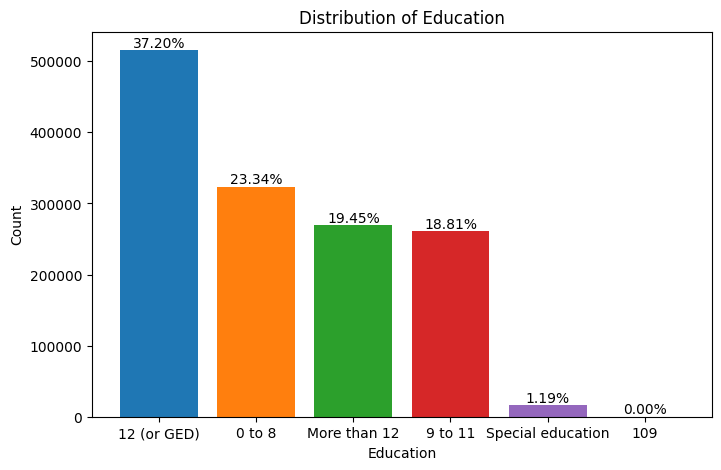

In [85]:
# Get the value counts as integers and sort by index
temp = df_top['EDUC'].value_counts()

# Calculate the percentages
percentages = temp / temp.sum() * 100

# Create the figure and set figsize
fig = plt.figure(figsize=(8, 5))

# Create the bar plot
bars = plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', 
             ha='center', va='bottom')

# Set chart title and labels
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of Education")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

### Check Null

In [60]:
print("EDUC null value: ", df_top["EDUC"].isna().sum())

EDUC null value:  854093


In [71]:
# Replace noisy data as null value
df_top.loc[(df_top['EDUC'] == '109'), 'EDUC'] = np.nan

### Cleaning data

In [72]:
age_mh_edu_distribution = df_top.groupby(['AGE_GROUP','MH1'], observed=True)['EDUC'].value_counts().unstack()
age_mh_edu_distribution = age_mh_edu_distribution.idxmax(axis=1)
print(age_mh_edu_distribution)

AGE_GROUP  MH1                                            
< 18       Alcohol or substance use disorders                     9 to 11
           Anxiety disorders                                       0 to 8
           Attention deficit/hyperactivity disorder (ADHD)         0 to 8
           Bipolar disorders                                       0 to 8
           Conduct disorders                                       0 to 8
           Delirium/dementia disorders                             0 to 8
           Depressive disorders                                    0 to 8
           Oppositional defiant disorders                          0 to 8
           Other disorders/conditions                              0 to 8
           Personality disorders                                   0 to 8
           Pervasive developmental disorders                       0 to 8
           Schizophrenia or other psychotic disorders              0 to 8
           Trauma- and stressor-related disorders    

In [73]:
# Replace noisy data as null value
df_top.loc[(df_top['EDUC'] == '109'), 'EDUC'] = np.nan

for (age_group, mh), edu in age_mh_edu_distribution.items():
    df_top.loc[(df_top['EDUC'].isna()) & (df_top['AGE_GROUP'] == age_group) & (df_top['MH1'] == mh), 'EDUC'] = edu


### After Cleaning

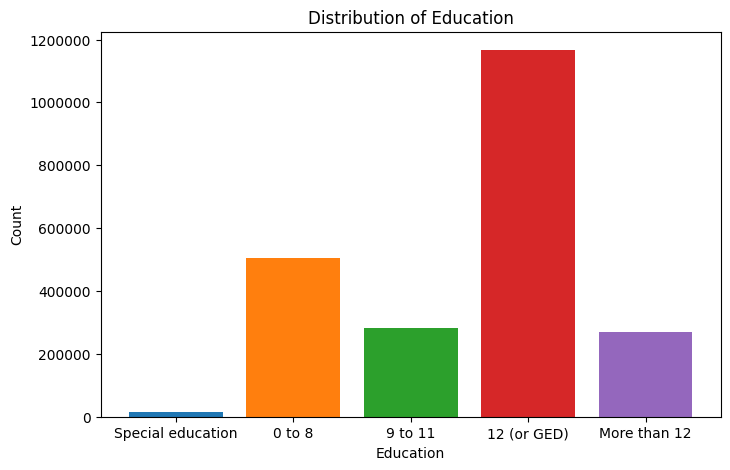

In [74]:
column_order = ['Special education','0 to 8','9 to 11','12 (or GED)','More than 12']

# Get the value counts as integers and sort by index
temp = df_top['EDUC'].value_counts().reindex(column_order)

# Create the figure and set figsize
fig = plt.figure(figsize=(8, 5))

# Create the bar plot
plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Distribution of Education")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

In [75]:
print("EDUC null value (After Cleaning): ", df_top["EDUC"].isna().sum())

EDUC null value (After Cleaning):  0


## Region Column

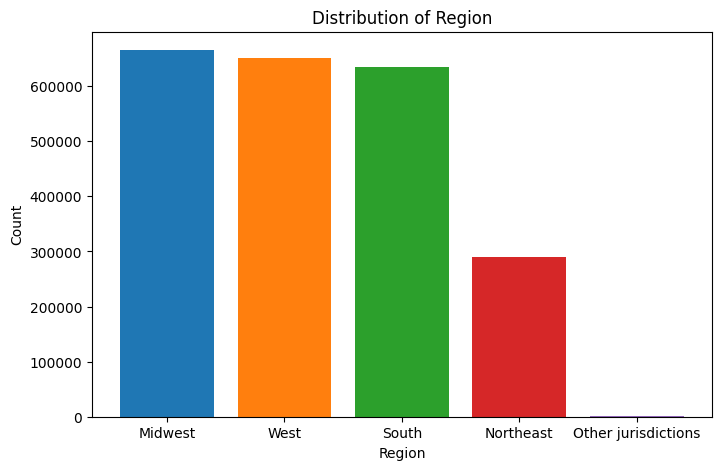

In [66]:
# Get the value counts as integers and sort by index
temp = df_top['REGION'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(8, 5))

# Create the bar plot
plt.bar(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Distribution of Region")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='y', style='plain')

# Show the plot
plt.show()

## Division Column

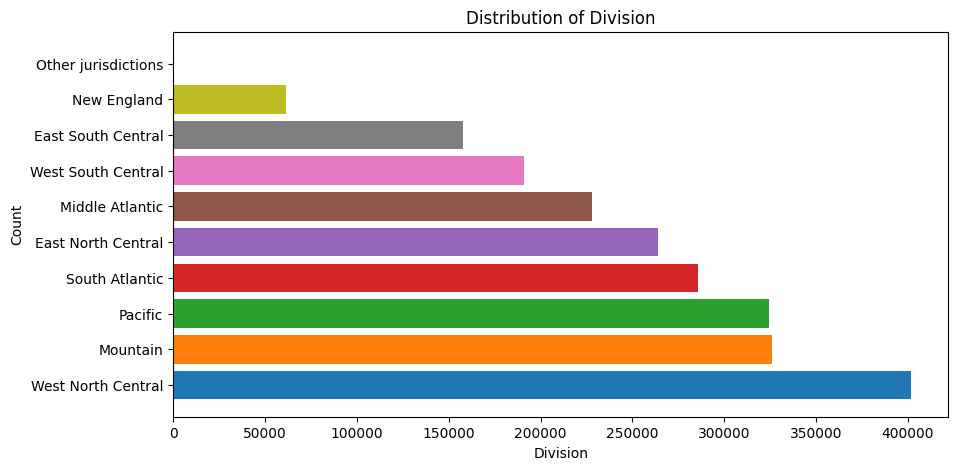

In [67]:
# Get the value counts as integers and sort by index
temp = df_top['DIVISION'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 5))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Division")
plt.ylabel("Count")
plt.title("Distribution of Division")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

## State Column

In [87]:
# Dirtify - Randomly select a subset of rows
def random_subset(df_set, number):
    return df_set.sample(n=number).index  

# Replace the AGE values in the selected rows with 0
df_top.loc[random_subset(df_top[df_top['STATEFIP'] == 'California'], 42), 'STATEFIP'] = "Califronia"
df_top.loc[random_subset(df_top[df_top['STATEFIP'] == 'California'], 1), 'STATEFIP'] = "1"
df_top.loc[random_subset(df_top[df_top['STATEFIP'] == 'California'], 102), 'STATEFIP'] = "London"
df_top.loc[random_subset(df_top[df_top['STATEFIP'] == 'California'], 93), 'STATEFIP'] = "Berlin"

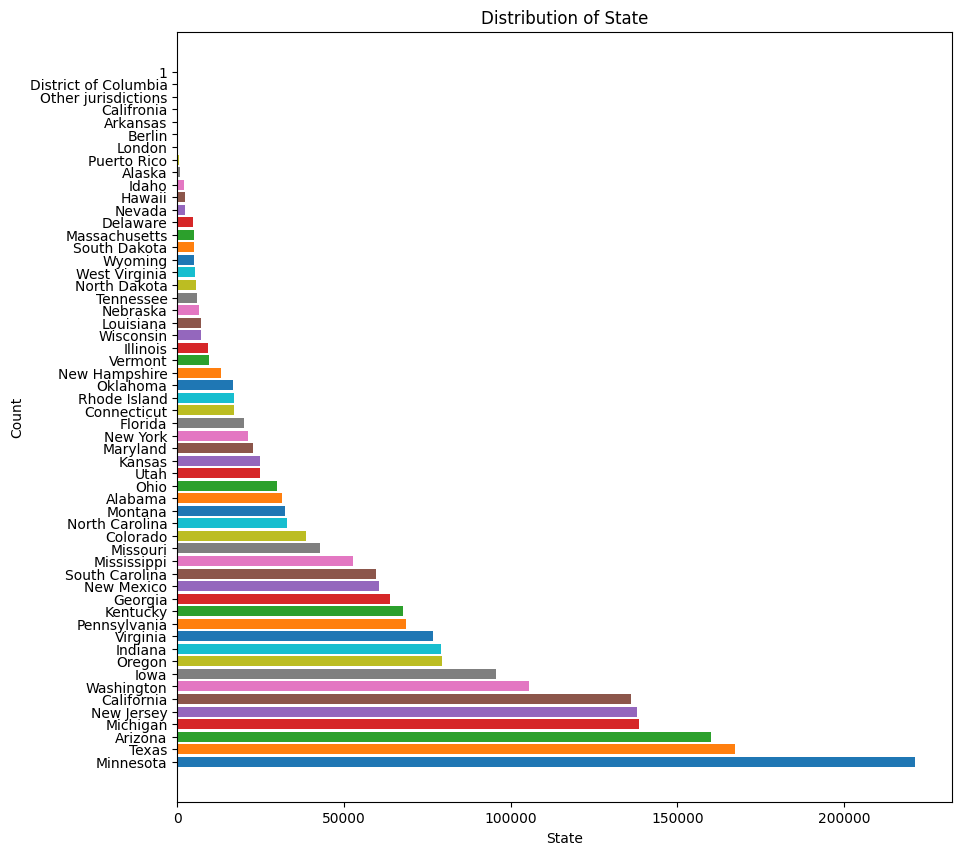

In [88]:
# Get the value counts as integers and sort by index
temp = df_top['STATEFIP'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 10))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of State")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

### Cleaning state data

In [76]:
# Find the most frequent state for each division 
state_division_distribution = df_top.groupby('DIVISION')['STATEFIP'].value_counts().unstack()
state_division_mode = state_division_distribution.idxmax(axis=1) # first occurrence of the maximum value
print(state_division_mode)

DIVISION
East North Central        Michigan
East South Central        Kentucky
Middle Atlantic         New Jersey
Mountain                   Arizona
New England            Connecticut
Other jurisdictions    Puerto Rico
Pacific                 California
South Atlantic            Virginia
West North Central       Minnesota
West South Central           Texas
dtype: object


In [71]:
df_top.loc[df_top["STATEFIP"] == "Califronia", "STATEFIP"] = "California" # Spelling error

# replace with most frequent state based on their division

for division, state in state_division_mode.items():
    df_top.loc[((df_top["STATEFIP"] == "1") | (df_top["STATEFIP"] == "Berlin") | (df_top["STATEFIP"] == "London")) & (df_top["DIVISION"] == division), "STATEFIP"] = state



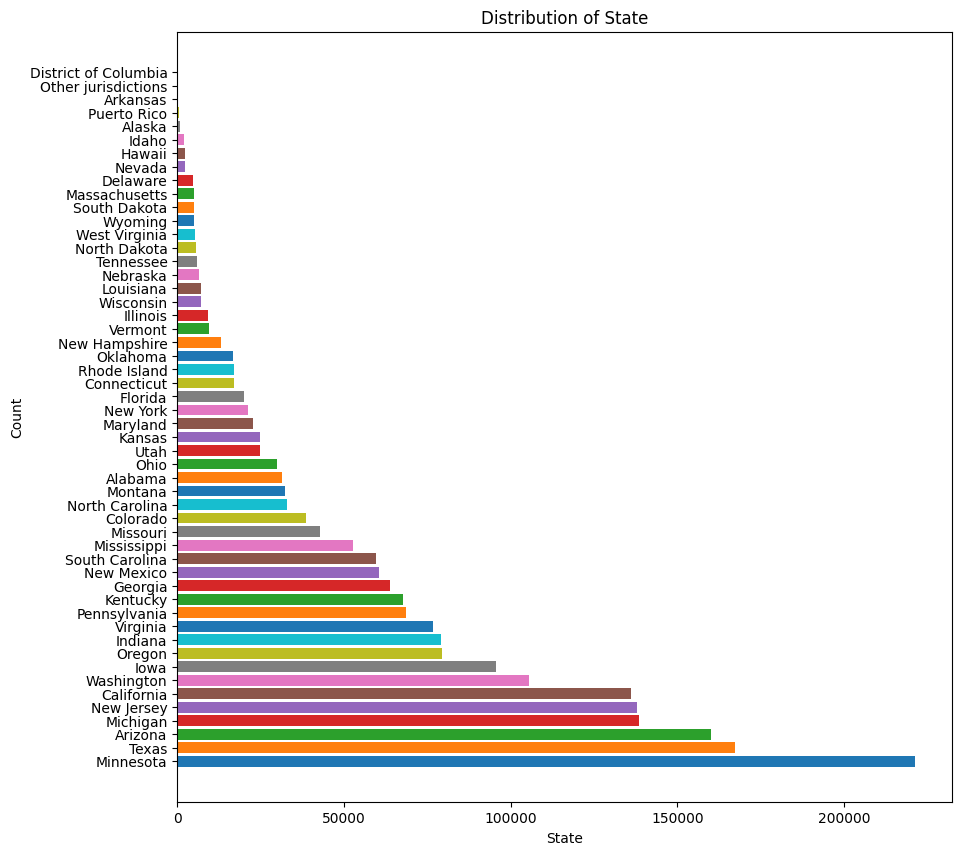

In [77]:
# Get the value counts as integers and sort by index
temp = df_top['STATEFIP'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 10))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("State")
plt.ylabel("Count")
plt.title("Distribution of State")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

## MH2 Column

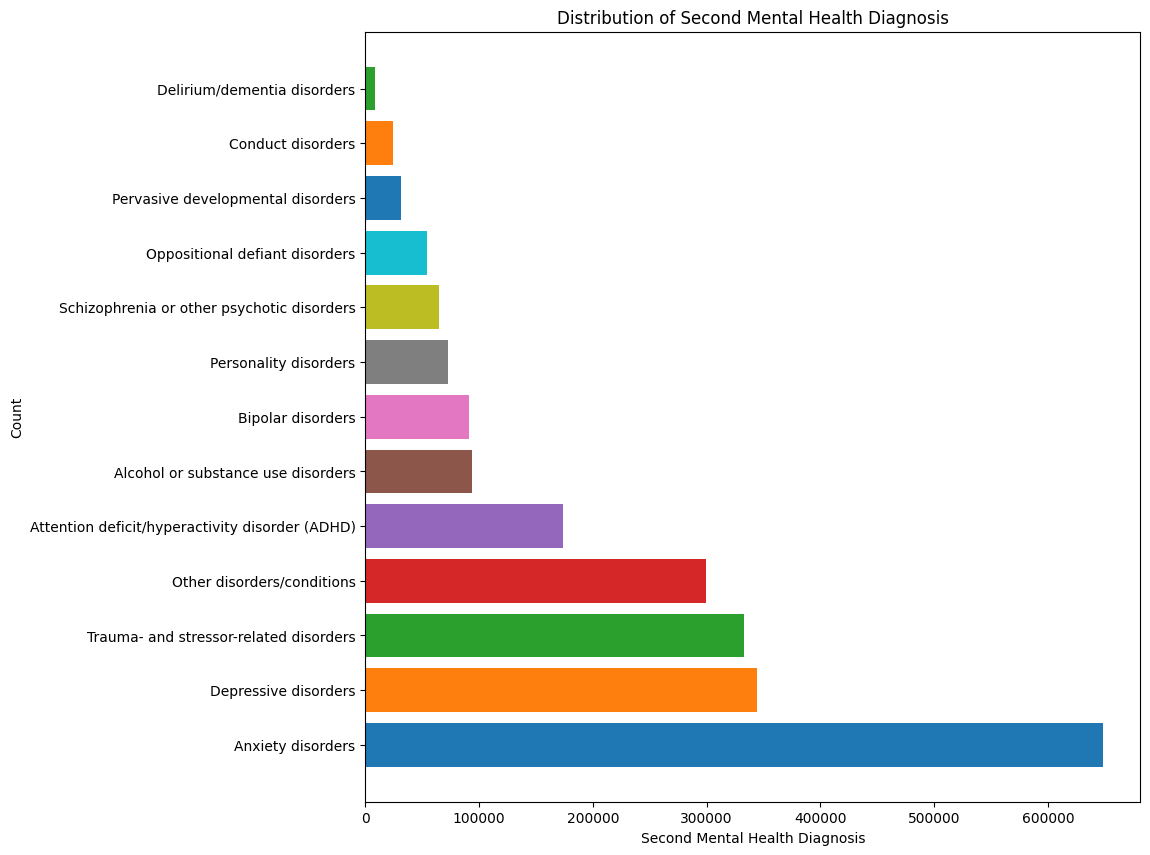

In [78]:
# Get the value counts as integers and sort by index
temp = df_top['MH2'].value_counts()

# Create the figure and set figsize
fig = plt.figure(figsize=(10, 10))

# Create the bar plot
plt.barh(temp.index, temp.values, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.xlabel("Second Mental Health Diagnosis")
plt.ylabel("Count")
plt.title("Distribution of Second Mental Health Diagnosis")

# Use ticklabel_format to avoid scientific notation for counts (y-axis)
plt.ticklabel_format(axis='x', style='plain')

# Show the plot
plt.show()

In [83]:
print("Number of target class: ", len(df_top["MH2"].unique()))

13


## Save cleaned dataset

In [73]:
df_top = df_top.drop(columns=['AGE'])
df_top.to_csv("cleaned_mhcld.csv", index=False)

# Read Cleaned dataset

In [1]:
import pandas as pd
df_clean = pd.read_csv("/kaggle/input/us-mental-client-data/cleaned_mhcld.csv")


# Scope 1 -  To create an OLAP dashboard that visualizes the relationship of different levels of mental illness across demographic. 

# Descriptive analysis

## OLAP

In [2]:
df_clean["MH1_MH2"] = df_clean["MH1"] + " | " + df_clean["MH2"]

In [3]:
from matplotlib import gridspec

In [4]:
# Setting
mh_column_order = ['Depressive disorders',
    'Trauma- and stressor-related disorders',
    'Anxiety disorders',
    'Schizophrenia or other psychotic disorders',
    'Bipolar disorders',
    'Other disorders/conditions',
    'Attention deficit/hyperactivity disorder (ADHD)',
    'Alcohol or substance use disorders',
    'Oppositional defiant disorders',
    'Pervasive developmental disorders',
    'Conduct disorders',
    'Personality disorders',
    'Delirium/dementia disorders']

mh_color_mapping = {
    'Depressive disorders': '#1f77b4',  # Blue
    'Trauma- and stressor-related disorders': '#ff7f0e',  # Orange
    'Anxiety disorders': '#2ca02c',  # Green
    'Schizophrenia or other psychotic disorders': '#d62728',  # Red
    'Bipolar disorders': '#9467bd',  # Purple
    'Other disorders/conditions': '#8c564b',  # Brown
    'Attention deficit/hyperactivity disorder (ADHD)': '#e377c2',  # Pink
    'Alcohol or substance use disorders': '#7f7f7f',  # Gray
    'Oppositional defiant disorders': '#bcbd22',  # Olive
    'Pervasive developmental disorders': '#17becf',  # Cyan
    'Conduct disorders': '#ffbb78',  # Light Orange
    'Personality disorders': '#c5b0d5',  # Light Purple
    'Delirium/dementia disorders': '#ff9896'  # Light Red
}

def check_mh_exist(series):
    for mh in mh_column_order:
        if mh not in series:
            series[mh] = 0
    
    return series

def make_autopct(fontsize=50):
        return lambda pct: f'{pct:.1f}%'

In [5]:
def create_dashboard(region_filter = "", division_filter = "", state_filter = "", age_filter = "", gender_filter = "", smised_filter = "", marital_filter = "", education_filter = "", sap_filter = "", mh1_filter = "", mh2_filter = ""):
    df_plot = df_clean
    print()
        
    if region_filter != "":
        df_plot = df_plot[df_plot["REGION"] == region_filter]
    
    if division_filter != "":
        df_plot = df_plot[df_plot["DIVISION"] == division_filter]
        
    if state_filter != "":
        df_plot = df_plot[df_plot["STATEFIP"] == state_filter]
    
    if age_filter != "":
        df_plot = df_plot[df_plot["AGE_GROUP"] == age_filter]
    
    if gender_filter != "":
        df_plot = df_plot[df_plot["GENDER"] == gender_filter]
        
    if smised_filter != "":
        df_plot = df_plot[df_plot["SMISED"] == smised_filter]
    
    if marital_filter != "":
        df_plot = df_plot[df_plot["MARSTAT"] == marital_filter]
        
    if education_filter != "":
        df_plot = df_plot[df_plot["EDUC"] == education_filter]
    
    if sap_filter != "":
        df_plot = df_plot[df_plot["SAP"] == sap_filter]

    if mh1_filter != "":
        df_plot = df_plot[df_plot["MH1"] == mh1_filter]
        
    if mh2_filter != "":
        df_plot = df_plot[df_plot["MH2"] == mh2_filter]
    
    
    # Create a figure with a GridSpec layout
    fig = plt.figure(figsize=(37, 30))

    gs = gridspec.GridSpec(3, 4)  # Define a 3x3 grid

    # Create subplots with specified positions
    mh1_ax = fig.add_subplot(gs[0, 0])       # First row, second column
    mh2_ax = fig.add_subplot(gs[1, 0])    # First row, third column
    mh1_mh2_ax = fig.add_subplot(gs[2, 0])
    location_ax = fig.add_subplot(gs[0, 1:4])   # This first and second row with first column
    age_ax = fig.add_subplot(gs[1, 1])
    gender_ax = fig.add_subplot(gs[1, 2])    # First row, second column
    education_ax = fig.add_subplot(gs[1, 3])      # First row, third column
    marital_ax = fig.add_subplot(gs[2, 1])       # Third row, first column
    sap_ax = fig.add_subplot(gs[2, 2])       # Third row, second column
    smised_ax = fig.add_subplot(gs[2, 3])
    

    location = ""
    # Create barchart for location
    if (state_filter != ""):
        # Create barchart for state
        temp = df_plot['STATEFIP'].value_counts()
        location = "State"
        
    elif (division_filter != ""):
        # Create barchart for state
        temp = df_plot['STATEFIP'].value_counts()
        location = "State"
        
    elif (region_filter != ""):
        # Create barchart for division
        temp = df_plot['DIVISION'].value_counts()
        location = "Division"
        
    else:
        # Create barchart for region
        temp = df_plot['REGION'].value_counts()
        location = "Region"
        
    # Calculate percentages
    percentages = (temp / temp.sum()) * 100
    
    location_ax.bar(temp.index, temp.values, color=plt.get_cmap('tab20').colors)
    location_ax.set_xlabel(location, fontsize = 18)
    location_ax.set_ylabel("Count", fontsize = 18)
    location_ax.set_title("Distribution of "+ location, fontsize = 20)
    location_ax.ticklabel_format(axis='y', style='plain')
    location_ax.tick_params(axis='x', labelsize=18) 
    
#     # Add percentage labels
#     for i in range(len(temp)):
#         location_ax.text(temp.iloc[i], i, f'{percentages.iloc[i]:.1f}%', va='center', fontsize=12, color='black')
        
    # Create pie chart for age group
    temp = df_plot['AGE_GROUP'].value_counts()
    age_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    age_ax.set_title('Distribution of Age Group', fontsize = 20)
#     age_ax.legend(temp.index, title="Age Group", loc="upper right")
    
    # Create pie chart for gender
    temp = df_plot['GENDER'].value_counts()
    gender_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    gender_ax.set_title('Distribution of Gender', fontsize = 20)
#     gender_ax.legend(temp.index, title="Gender", loc="upper right")
    
    # Create pie chart for marital status
    temp = df_plot['MARSTAT'].value_counts()
    marital_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    marital_ax.set_title('Distribution of Marital Status', fontsize = 20)
#     marital_ax.legend(temp.index, title="Marital Status", loc="upper right")
    
    # Create pie chart for smised
    temp = df_plot['SMISED'].value_counts()
    smised_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    smised_ax.set_title('Distribution of SMISED', fontsize = 20)
#     smised_ax.legend(temp.index, title="SMISED Status", loc="upper right")
    
    # Create pie chart for race
    temp = df_plot['EDUC'].value_counts()
    education_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    education_ax.set_title('Distribution of Education', fontsize = 20)
#     education_ax.legend(temp.index, title="Education", loc="upper right")

    # Create pie chart for race
    temp = df_plot['SAP'].value_counts()
    sap_ax.pie(temp, labels=temp.index, autopct='%1.1f%%', textprops={'fontsize': 16}, colors=plt.get_cmap('tab10').colors)
    sap_ax.set_title('Distribution of Substance use problems', fontsize = 20)
#     sap_ax.legend(temp.index, title="Substance use problems (SAP)", loc="upper right")

    # Create bar chart for MH1
    temp = check_mh_exist(df_plot['MH1'].value_counts()).reindex(mh_column_order)
    
    # Calculate percentages
    percentages = (temp / temp.sum()) * 100

    mh1_ax.barh(temp.index, temp.values, color=[mh_color_mapping[col] for col in mh_column_order])
    mh1_ax.set_xlabel("Count", fontsize = 18)
    mh1_ax.set_ylabel("Mental illness", fontsize = 18)
    mh1_ax.set_title("Distribution of First Mental Health Diagnosis", fontsize = 20)
    mh1_ax.ticklabel_format(axis='x', style='plain')
    mh1_ax.tick_params(axis='y', labelsize=18) 
    
    # Add percentage labels
    for i in range(len(temp)):
        mh1_ax.text(temp.iloc[i], i, f'{percentages.iloc[i]:.1f}%', va='center', fontsize=12, color='black')
    
    # Create bar chart for MH2
    temp = check_mh_exist(df_plot['MH2'].value_counts()).reindex(mh_column_order)
    
    # Calculate percentages
    percentages = (temp / temp.sum()) * 100
    
    mh2_ax.barh(temp.index, temp.values, color=[mh_color_mapping[col] for col in mh_column_order])
    mh2_ax.set_xlabel("Count", fontsize = 18)
    mh2_ax.set_ylabel("Mental illness", fontsize = 18)
#     mh2_ax.set_yticklabels([])
    mh2_ax.set_title("Distribution of Second Mental Health Diagnosis", fontsize = 20)
    mh2_ax.ticklabel_format(axis='x', style='plain')
    mh2_ax.tick_params(axis='y', labelsize=18) 
    
    # Add percentage labels
    for i in range(len(temp)):
        mh2_ax.text(temp.iloc[i], i, f'{percentages.iloc[i]:.1f}%', va='center', fontsize=12, color='black')
    
    temp = df_plot["MH1_MH2"].value_counts()[:10].sort_values(ascending=True)
    mh1_mh2_ax.barh(temp.index, temp.values, color=plt.get_cmap('tab20').colors)
    mh1_mh2_ax.set_xlabel("Count", fontsize = 18)
    mh1_mh2_ax.set_ylabel("Combination of Mental illness", fontsize = 18)
    mh1_mh2_ax.set_title("Top 10 combination of mental illness",  fontsize = 20)
    mh1_mh2_ax.ticklabel_format(axis='x', style='plain')
    mh1_mh2_ax.tick_params(axis='y', labelsize=18)


In [6]:
# ========================================================================= Region Filter ===========================================================================
# 'South', 'West', 'Northeast', 'Midwest', 'Other jurisdictions'

# ========================================================================= Division Filter ===========================================================================
# 'East South Central', 'Pacific', 'Mountain', 'West South Central', 'New England', 'South Atlantic', 'East North Central',
# 'West North Central', 'Middle Atlantic', 'Other jurisdictions'

# =========================================================================== State filter =========================================================================== 
# 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California','Colorado', 'Connecticut', 'Delaware', 'District of Columbia','Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
# 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland','Massachusetts', 'Michigan', 'Minnesota', 'Mississippi','Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
# 'New Jersey', 'New Mexico', 'New York', 'North Carolina','North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania','Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
# 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington','West Virginia', 'Wisconsin', 'Wyoming', 'Other jurisdictions','Puerto Rico'

# =========================================================================== Age filter =========================================================================== 
# '< 18', '18 - 25', '26 - 49', '50+'

# =========================================================================== Gender filter =========================================================================== 
# 'Female', 'Male'

# =========================================================================== SMISED filter =========================================================================== 
# 'SMI', 'SED and/or at risk for SED', 'Not SMI/SED'

# ======================================================================== Education filter =========================================================================== 
# '0 to 8', '9 to 11', '12 (or GED)', 'More than 12','Special education'

# ======================================================================== Marital status filter =========================================================================== 
# 'Now married', 'Never married', 'Divorced, widowed', 'Separated'

# ======================================================================== SAP filter =========================================================================== 
# 'Yes', "No"

# =========================================================================== MH filter =========================================================================== 
# 'Schizophrenia or other psychotic disorders','Depressive disorders', 'Bipolar disorders','Other disorders/conditions', 'Delirium/dementia disorders',
# 'Trauma- and stressor-related disorders', 'Anxiety disorders', 'Attention deficit/hyperactivity disorder (ADHD)','Oppositional defiant disorders', 
# 'Conduct disorders','Personality disorders', 'Pervasive developmental disorders','Alcohol or substance use disorders'

# California < 18 Male
region_filter = ""
division_filter = ""
state_filter = ""
age_filter = ""
gender_filter = ""
smised_filter = ""
marital_filter = ""
education_filter = ""
sap_filter = ""
mh1_filter = ""
mh2_filter = ""

create_dashboard(region_filter, division_filter, state_filter, age_filter,gender_filter, smised_filter, marital_filter, education_filter, sap_filter, mh1_filter, mh2_filter)

NameError: name 'plt' is not defined

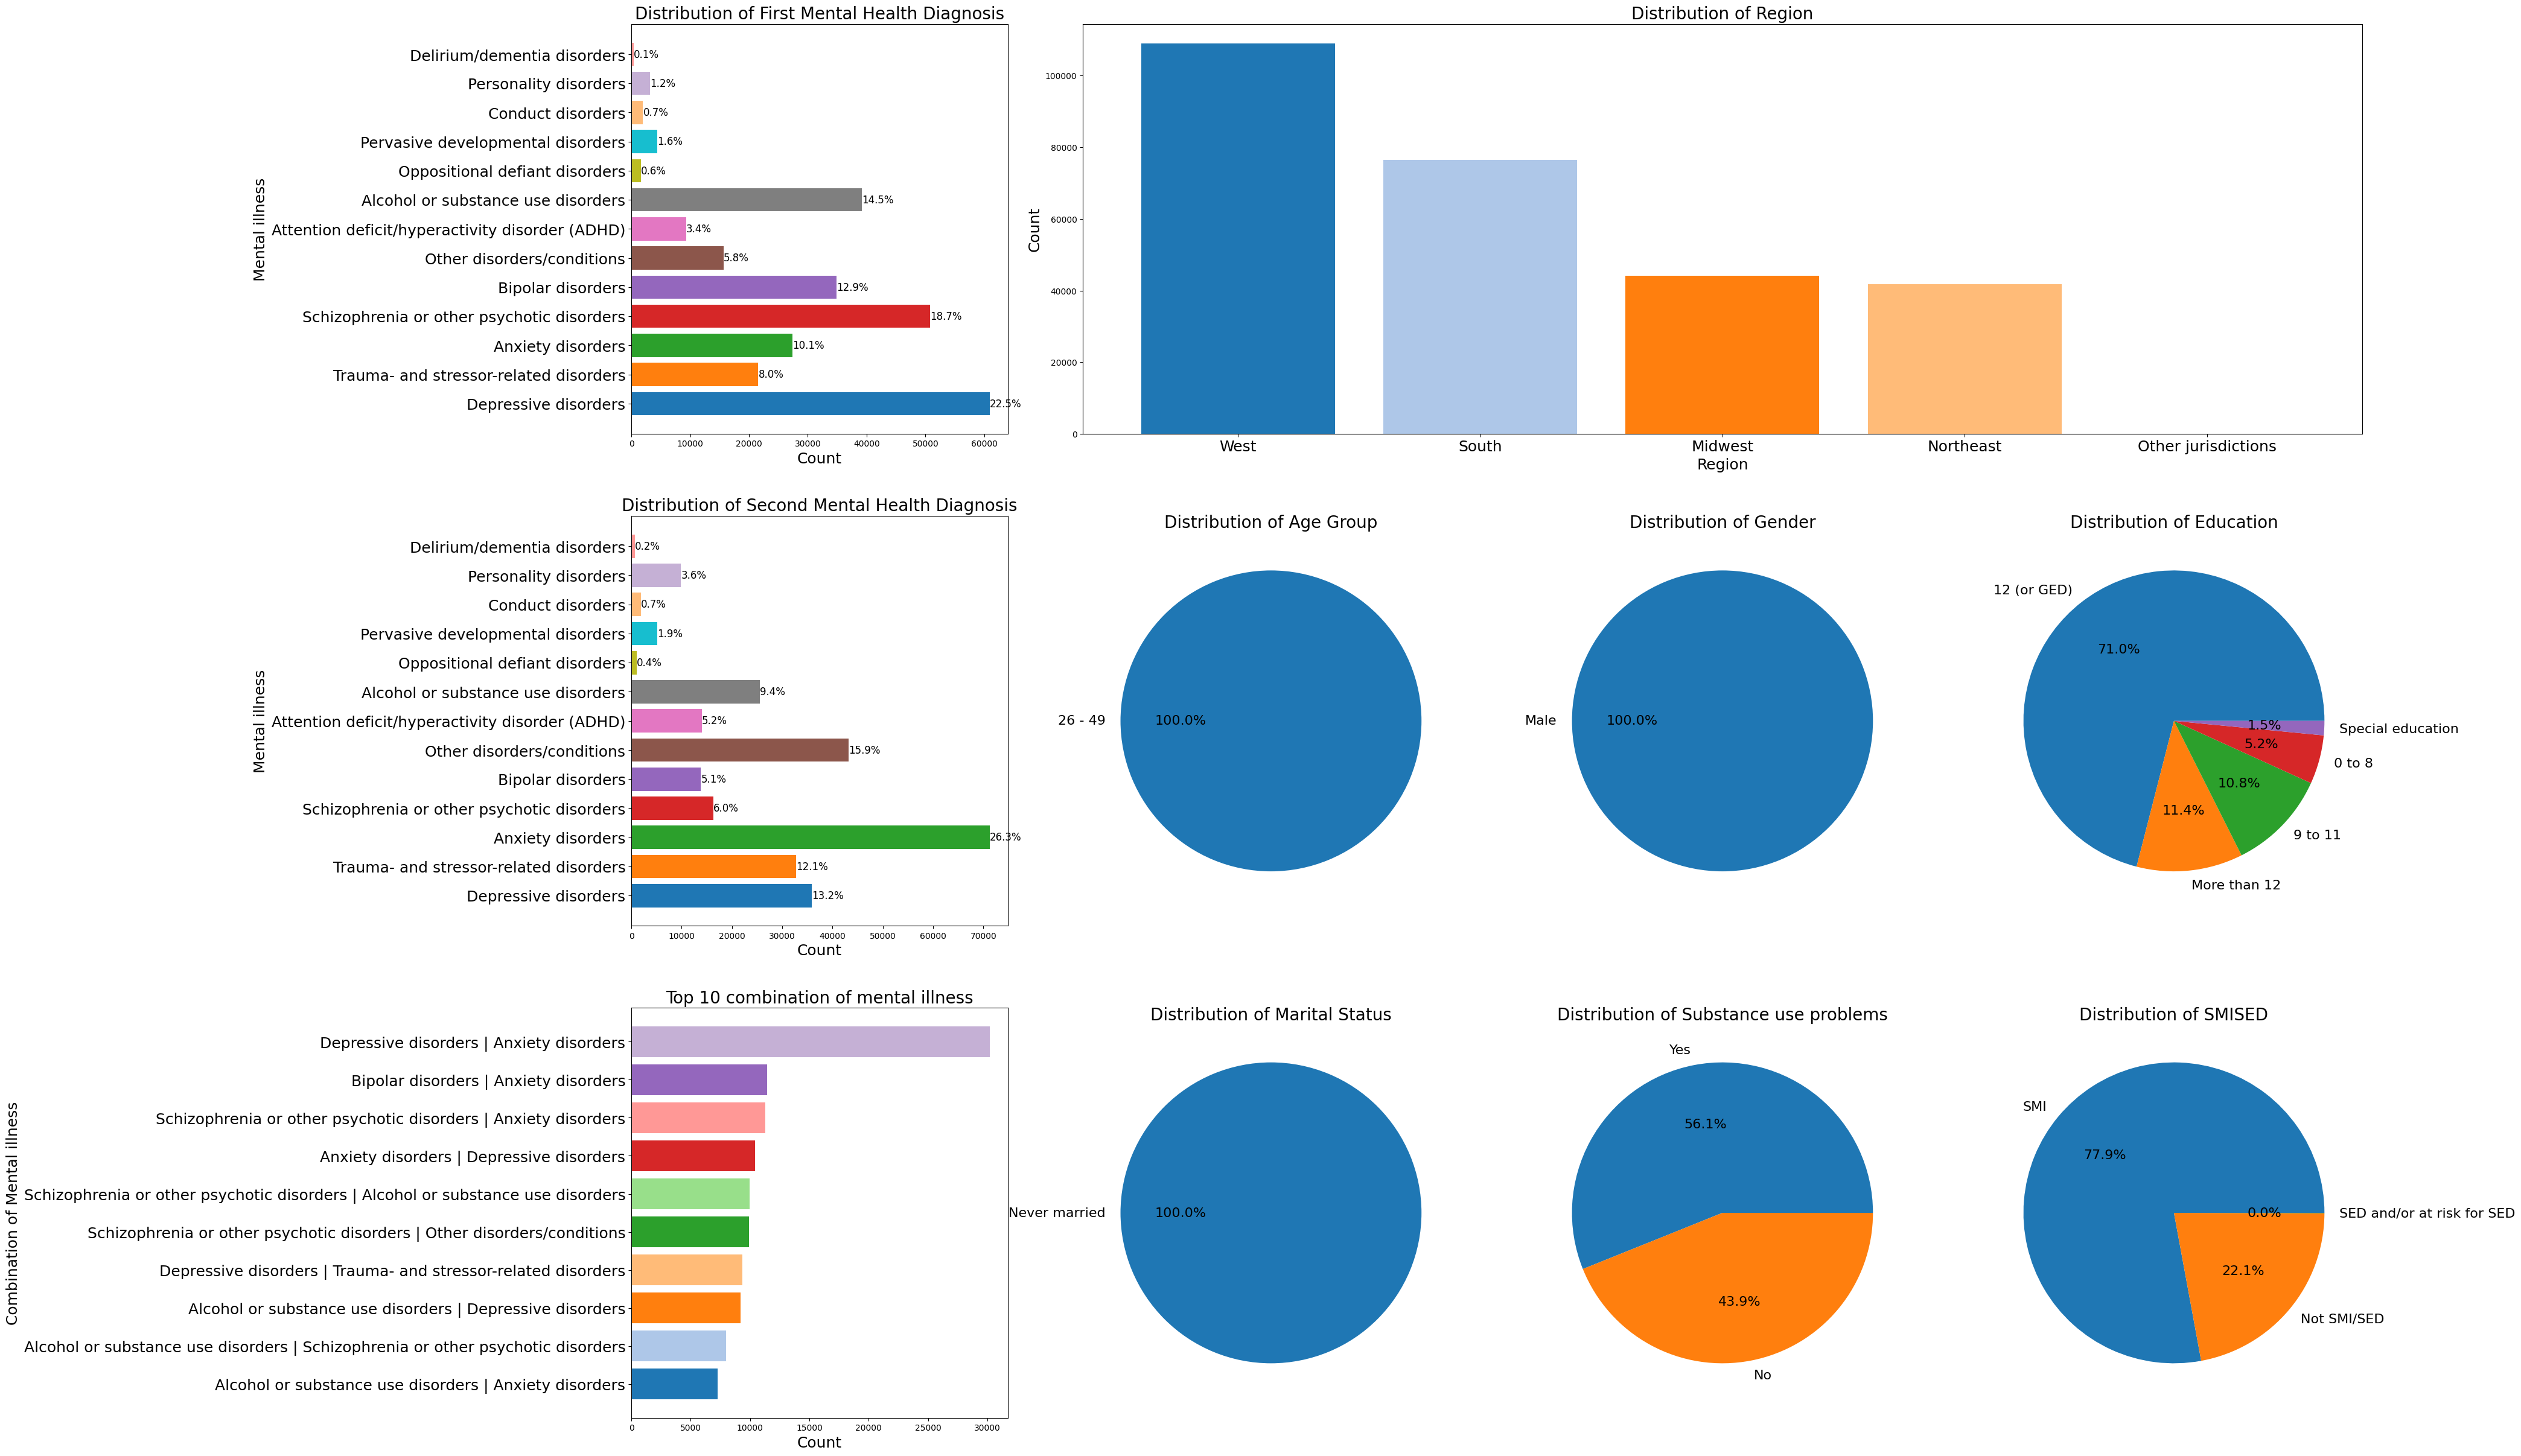

In [13]:
region_filter = ""
division_filter = ""
state_filter = ""
age_filter = "26 - 49"
gender_filter = "Male"
smised_filter = ""
marital_filter = "Never married"
education_filter = ""
sap_filter = ""
mh1_filter = ""
mh2_filter = ""

create_dashboard(region_filter, division_filter, state_filter, age_filter,gender_filter, smised_filter, marital_filter, education_filter, sap_filter, mh1_filter, mh2_filter)

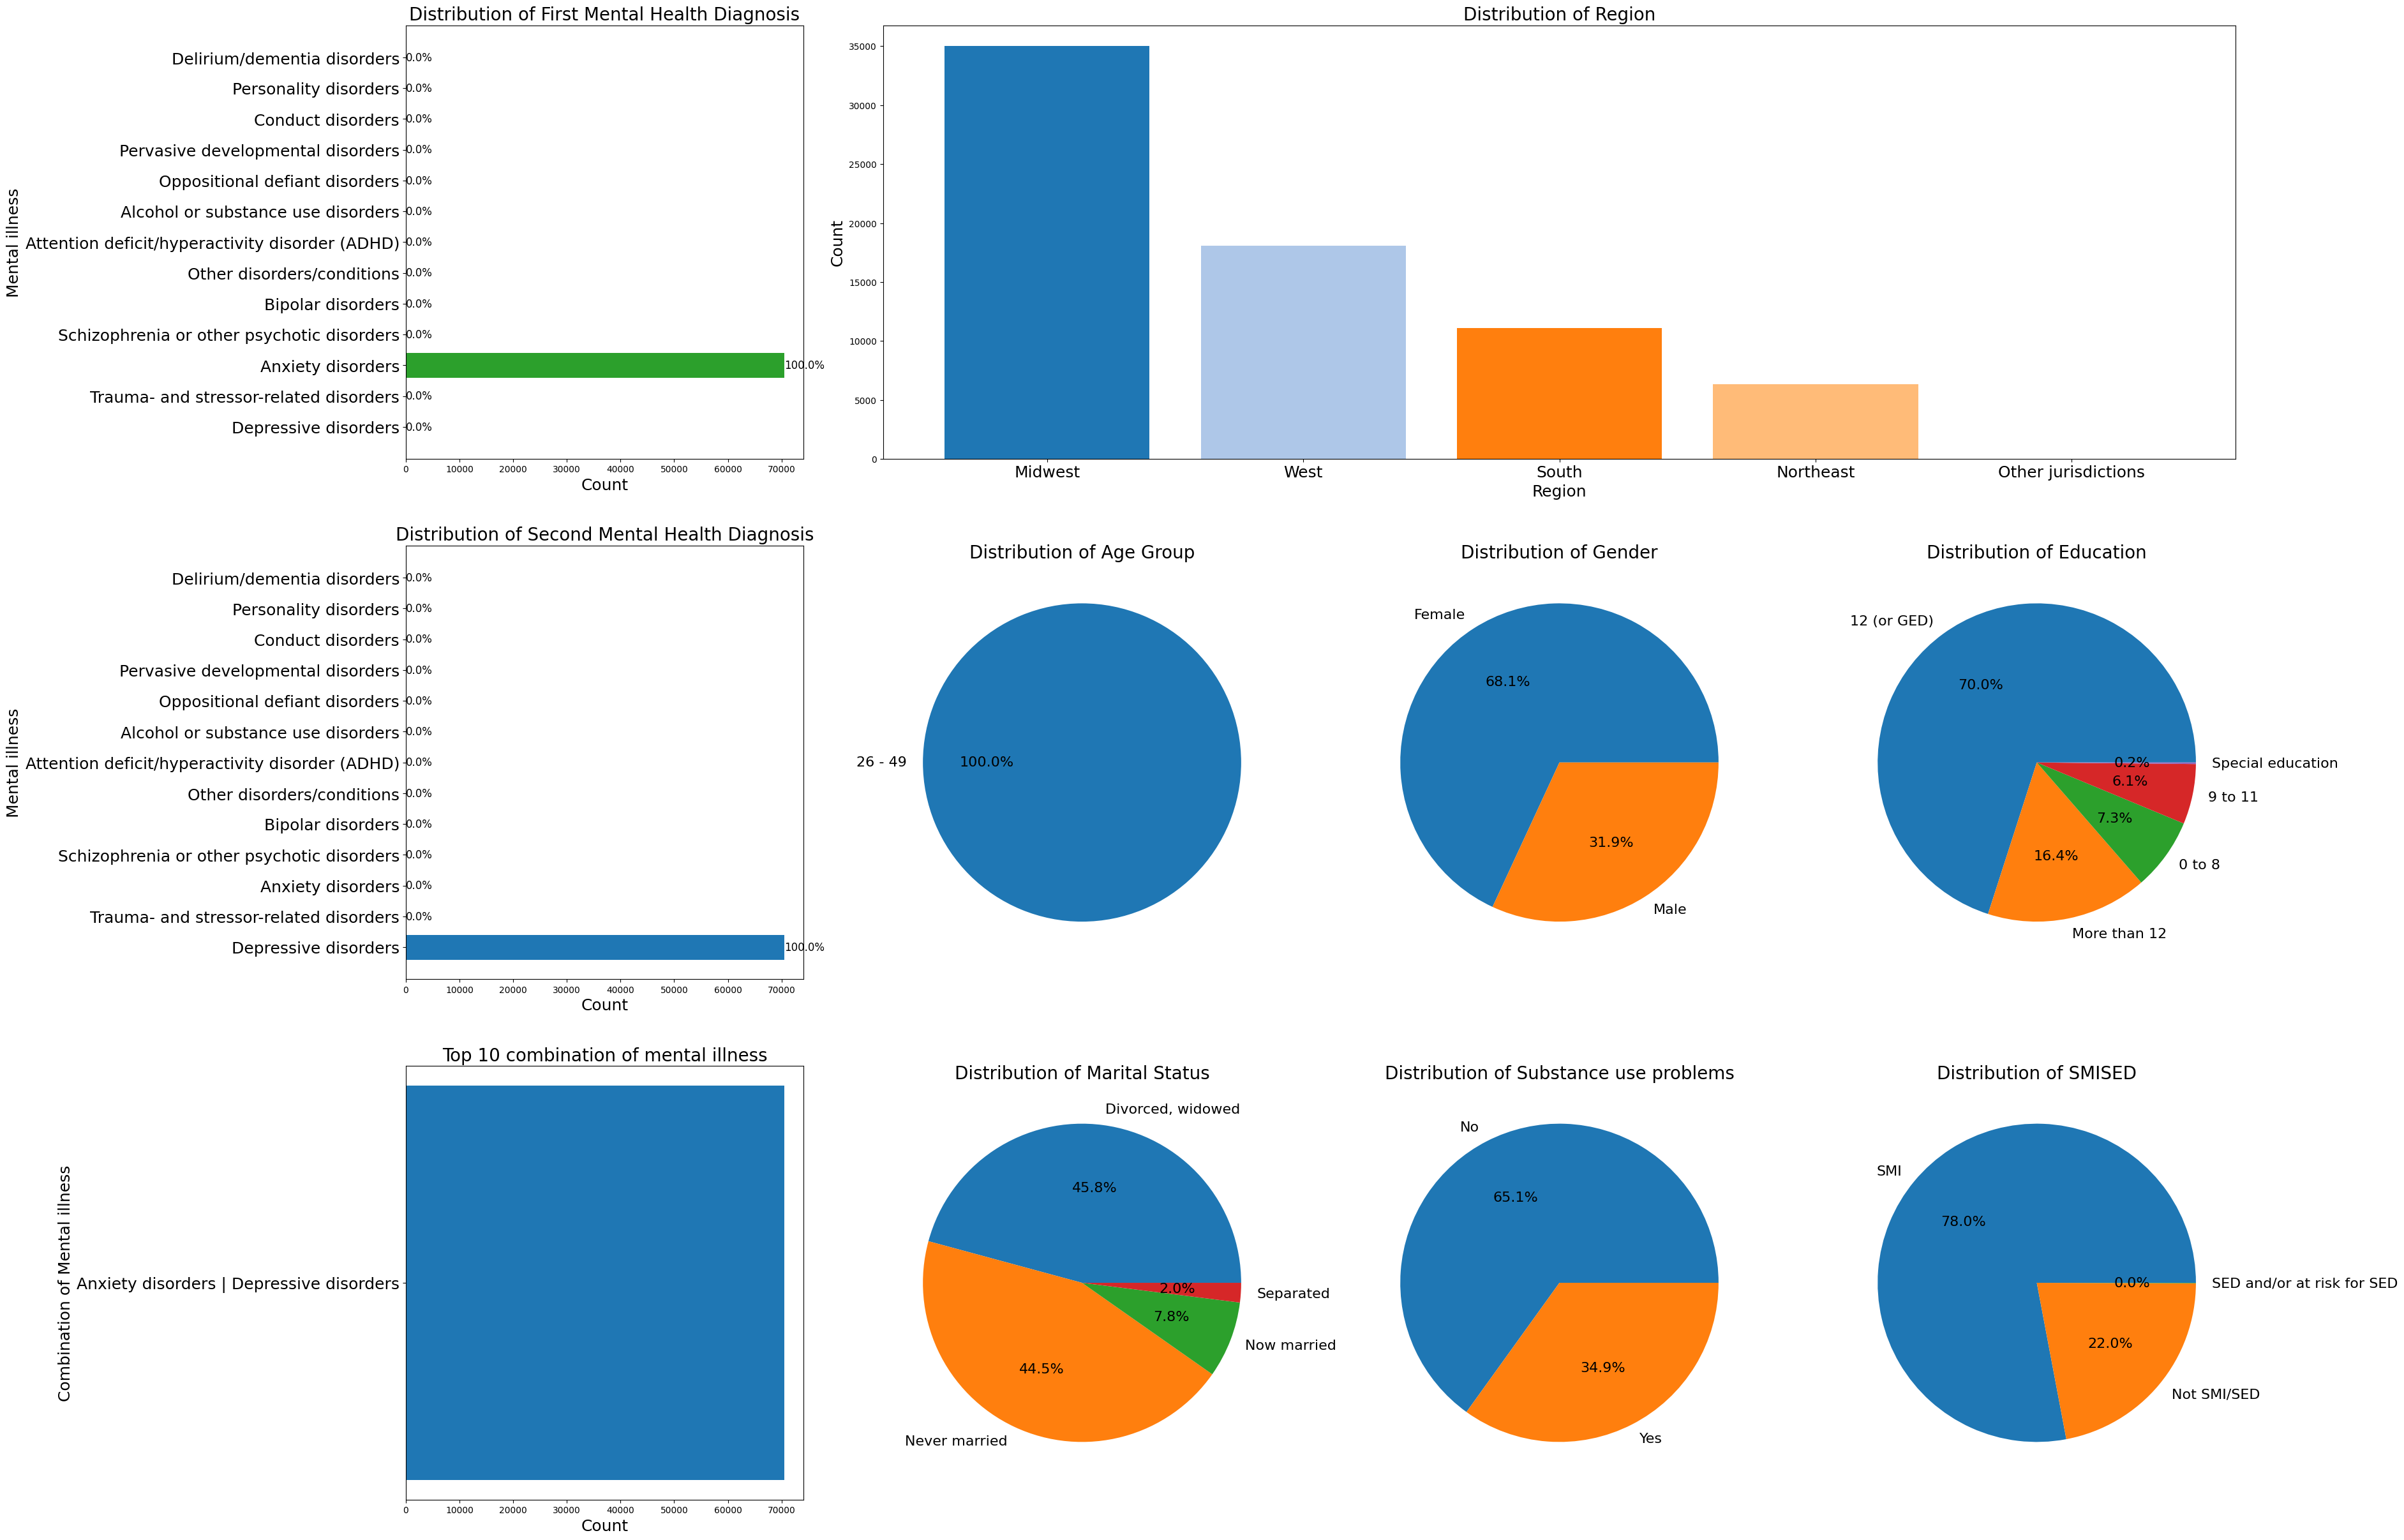

In [56]:
region_filter = ""
division_filter = ""
state_filter = ""
age_filter = "26 - 49"
gender_filter = ""
smised_filter = ""
marital_filter = ""
education_filter = ""
sap_filter = ""
mh1_filter = "Anxiety disorders"
mh2_filter = "Depressive disorders"

create_dashboard(region_filter, division_filter, state_filter, age_filter,gender_filter, smised_filter, marital_filter, education_filter, sap_filter, mh1_filter, mh2_filter)

# Scope 2 - To develop a classification model that predicts the subsequent mental illness category  based on patient’s current mental health condition and demographics.

# Predictive Analysis

## Preparing Data

In [ ]:
# Categorize MH2 into 5 main category
###############################################################################################################################################
# Category 1: Mood - Disturbances in a person's emotional state, 
# Depressive disorders
# Bipolar disorders

###############################################################################################################################################
# Category 2: Fear - Excessive fear, anxiety, or panic that interferes with daily activities
# Anxiety disorders
# Trauma- and stressor-related disorders

###############################################################################################################################################
# Category 3: Behaviour - Disruptive behaviors that are inappropriate for the individual
# Attention deficit/hyperactivity disorder (ADHD)
# Oppositional defiant disorders
# Conduct disorders

###############################################################################################################################################
# Category 4: Personality - Individual's patterns of thinking, feeling, and behaving that deviate significantly from cultural norms
# Personality disorders
# Pervasive developmental disorders

###############################################################################################################################################
# Category 5: Other - Any mental condition that does not fit into the other category
# Alcohol or substance use disorders
# Delirium/dementia disorders
# Other disorders/conditions
# Schizophrenia or other psychotic disorders

In [4]:
mh2_mapping = {
    'Depressive disorders': 'Mood',
    'Bipolar disorders': 'Mood',
    'Anxiety disorders': 'Fear',
    'Trauma- and stressor-related disorders': 'Fear',
    'Attention deficit/hyperactivity disorder (ADHD)': 'Behaviour',
    'Oppositional defiant disorders': 'Behaviour',
    'Conduct disorders': 'Behaviour',
    'Personality disorders': 'Personality',
    'Pervasive developmental disorders': 'Personality',
    'Alcohol or substance use disorders': 'Other',
    'Delirium/dementia disorders': 'Other',
    'Other disorders/conditions': 'Other',
    'Schizophrenia or other psychotic disorders': 'Other'
}

# Apply the mapping
df_clean["MH2"] = df_clean['MH2'].replace(mh2_mapping)

In [5]:
df_clean["MH2"].unique()

array(['Other', 'Fear', 'Behaviour', 'Mood', 'Personality'], dtype=object)

In [6]:
X = df_clean.drop(columns=['MH2'])
y = df_clean['MH2']

In [7]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

# Mapping to class
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

{'Behaviour': 0, 'Fear': 1, 'Mood': 2, 'Other': 3, 'Personality': 4}


In [8]:
X = pd.get_dummies(X, columns=['EDUC', 'GENDER', 'MH1', 'MARSTAT', 'SMISED', 'SAP', 'STATEFIP', 'DIVISION', 'REGION', 'AGE_GROUP'],  dtype='int')
X

,EDUC_0 to 8,EDUC_12 (or GED),EDUC_9 to 11,EDUC_More than 12,EDUC_Special education,GENDER_Female,GENDER_Male,MH1_Alcohol or substance use disorders,MH1_Anxiety disorders,MH1_Attention deficit/hyperactivity disorder (ADHD),...,DIVISION_West South Central,REGION_Midwest,REGION_Northeast,REGION_Other jurisdictions,REGION_South,REGION_West,AGE_GROUP_18 - 25,AGE_GROUP_26 - 49,AGE_GROUP_50+,AGE_GROUP_< 18
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240664,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2240665,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2240666,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2240667,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
X.rename(columns={'AGE_GROUP_< 18': 'AGE_GROUP_Less than 18'}, inplace=True)

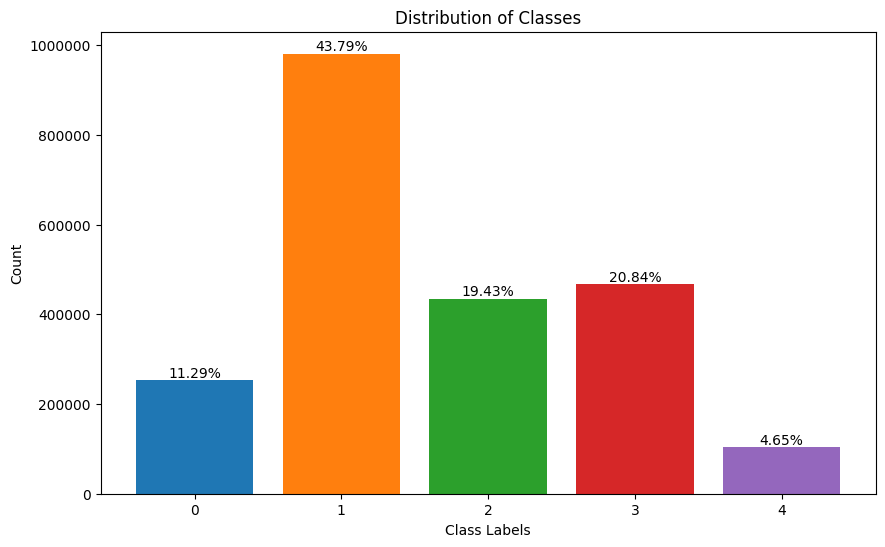

In [10]:
# Get unique elements and their counts
unique_elements, counts = np.unique(y, return_counts=True)

# Calculate the total count
total_count = counts.sum()

# Calculate percentages
percentages = (counts / total_count) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_elements, counts, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.title("Distribution of Classes")
plt.xlabel("Class Labels")
plt.ylabel("Count")

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', 
             ha='center', va='bottom')

plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [11]:
from imblearn.under_sampling import RandomUnderSampler
# Undersampling
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

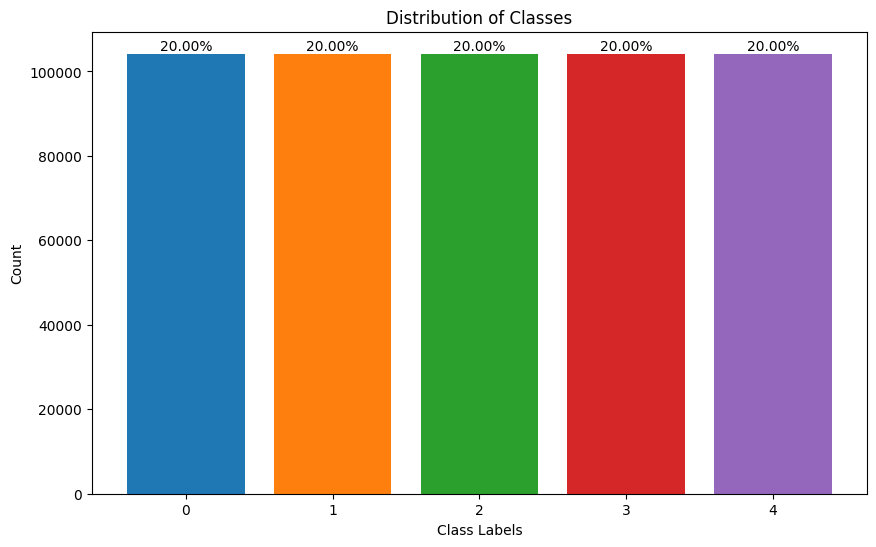

In [12]:
# Get unique elements and their counts
unique_elements, counts = np.unique(y_resampled, return_counts=True)

# Calculate the total count
total_count = counts.sum()

# Calculate percentages
percentages = (counts / total_count) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_elements, counts, color=plt.get_cmap('tab10').colors)

# Set chart title and labels
plt.title("Distribution of Classes")
plt.xlabel("Class Labels")
plt.ylabel("Count")

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', 
             ha='center', va='bottom')

plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, objective = "multi:softmax", n_estimators=100)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)
xgb_y_prob = xgb_model.predict_proba(X_test)

# Calculate training and test scores
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)

print("XGBoost Model:")
print ("Training Score: {}\nTest Score: {}" .format(xgb_train_score, xgb_test_score))

XGBoost Model:
Training Score: 0.5235465172076239
Test Score: 0.5185608169062746


In [15]:
# Get the number of classes and total number of trees
num_classes = xgb_model.n_classes_
num_trees = len(xgb_model.get_booster().get_dump())
trees_per_class = num_trees // num_classes

print("Total number of tree generated: ",num_trees)
print("Total number of tree generated for each class", trees_per_class)
print()
# Get tree dumps
trees = xgb_model.get_booster().get_dump()

# Print the range of tree numbers for each class
for i in range(num_classes):
    start_tree_index = i * trees_per_class
    end_tree_index = (i + 1) * trees_per_class - 1
    print(f"Class {i}: Trees {start_tree_index} to {end_tree_index}")

Total number of tree generated:  500
Total number of tree generated for each class 100

Class 0: Trees 0 to 99
Class 1: Trees 100 to 199
Class 2: Trees 200 to 299
Class 3: Trees 300 to 399
Class 4: Trees 400 to 499


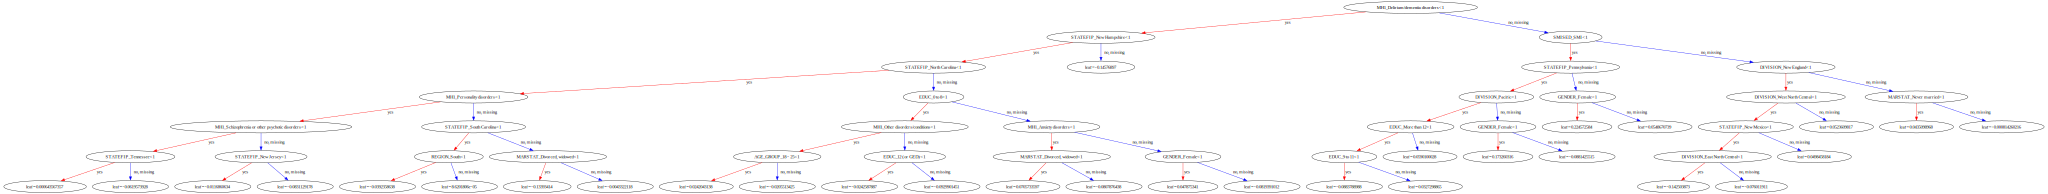

In [46]:
import graphviz
graph = xgb.to_graphviz(xgb_model, num_trees=200, rankdir='TB')
graph.render("xgboost_tree")
graph


In [16]:
xgb_y_pred[:5]

array([2, 1, 4, 0, 3], dtype=int32)

In [17]:
counter = 0
for probability in xgb_y_prob[:5]:
    for i in probability:
        print(f"Class {counter}: {i}\t", end="")
        counter +=1
        
        if (counter == 5):
            counter = 0 # Reset counter 
            print()

Class 0: 0.0763271301984787	Class 1: 0.24227841198444366	Class 2: 0.42287564277648926	Class 3: 0.17677775025367737	Class 4: 0.08174102008342743	
Class 0: 0.26273486018180847	Class 1: 0.5643888115882874	Class 2: 0.0008686634246259928	Class 3: 0.096568264067173	Class 4: 0.07543931901454926	
Class 0: 0.2508648633956909	Class 1: 0.15534372627735138	Class 2: 0.10758834332227707	Class 3: 0.14875070750713348	Class 4: 0.33745235204696655	
Class 0: 0.37404122948646545	Class 1: 0.3420954942703247	Class 2: 0.044607486575841904	Class 3: 0.1436833143234253	Class 4: 0.09557251632213593	
Class 0: 0.010499566793441772	Class 1: 0.049702826887369156	Class 2: 0.4409659206867218	Class 3: 0.47388702630996704	Class 4: 0.024944694712758064	


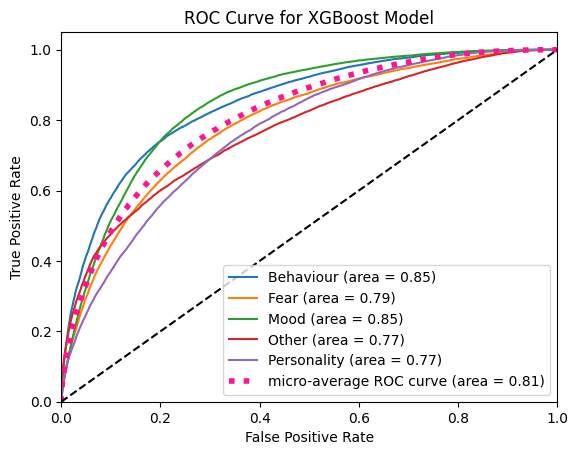

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Your label mapping
class_names = list(label_mapping.keys())

# Binarize the output
y_test_bin = label_binarize(y_test, classes=list(label_mapping.values()))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], xgb_y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), xgb_y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='{0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

# Plot ROC curve for micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,xgb_y_pred, target_names=label_mapping))

print ("Training Score: {}\nTest Score: {}" .format(xgb_train_score, xgb_test_score))

              precision    recall  f1-score   support

   Behaviour       0.57      0.61      0.59     20820
        Fear       0.49      0.50      0.50     20933
        Mood       0.50      0.68      0.57     20862
       Other       0.58      0.42      0.49     20716
 Personality       0.46      0.37      0.41     20867

    accuracy                           0.52    104198
   macro avg       0.52      0.52      0.51    104198
weighted avg       0.52      0.52      0.51    104198

Training Score: 0.5235465172076239
Test Score: 0.5185608169062746


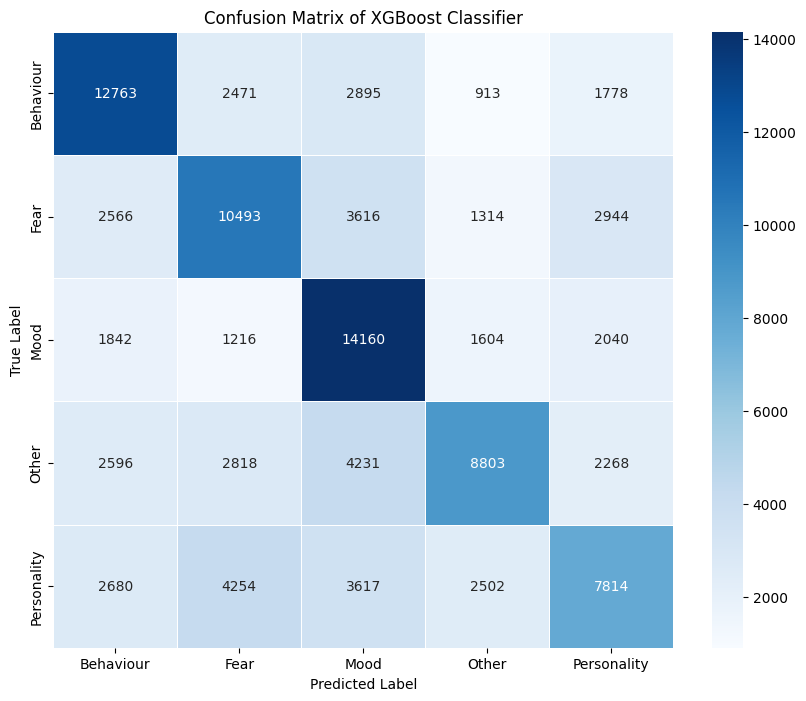

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 8))  # Adjust width and height as needed

# Generate confusion matrix
cm = confusion_matrix(y_test, xgb_y_pred)

# Plot confusion matrix
plt.title('Confusion Matrix of XGBoost Classifier')
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', linewidths=0.5, xticklabels=label_mapping, yticklabels=label_mapping)

# Add title and labels
plt.title('Confusion Matrix of XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.show()